# MNIST Dataset Exploratory Data Analysis (EDA)

This notebook performs an initial exploratory data analysis on the **Digits Dataset**, which is a simplified version of the MNIST dataset included in `scikit-learn`. The dataset consists of 1,797 8x8 grayscale images of handwritten digits (0-9).

The 64 columns of this dataset represent the pixel values of a preprocessed and normalized image of a handwritten digit. The value in each column (pixel) ranges from 0 to 16, representing the intensity or darkness of that particular pixel. A value of 0 indicates a white or blank pixel, while a value of 16 represents the darkest possible pixel. Values in between represent varying shades of gray.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

## 1. Load Data and Initial Exploration

In [10]:
# Load data
def load_mnist():
    data = load_digits()
    X, y = data.data, data.target
    return X, y, data

X, y, data = load_mnist()

print("=== MNIST DATASET EXPLORATORY ANALYSIS ===")
print(f"Dataset shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Classes: {np.unique(y)}")

=== MNIST DATASET EXPLORATORY ANALYSIS ===
Dataset shape: (1797, 64)
Target shape: (1797,)
Number of classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]


## 2. Basic Statistics and Missing Values

In [11]:
# Basic statistics
print("\n=== BASIC STATISTICS ===")
df = pd.DataFrame(X)
print(df.head())
print(df.describe())

# Check for missing values
print("=== MISSING VALUES ===")
print(f"Missing values in features: {np.isnan(X).sum()}")
print(f"Missing values in target: {np.isnan(y).sum()}")


=== BASIC STATISTICS ===
    0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]
           0            1            2            3            4   \
count  1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean      0.0     0.303840     5.204786    11.835838    11.848080   
std       0.0     0.907

## 3. Target Distribution (Class Balance)


=== TARGET DISTRIBUTION ===


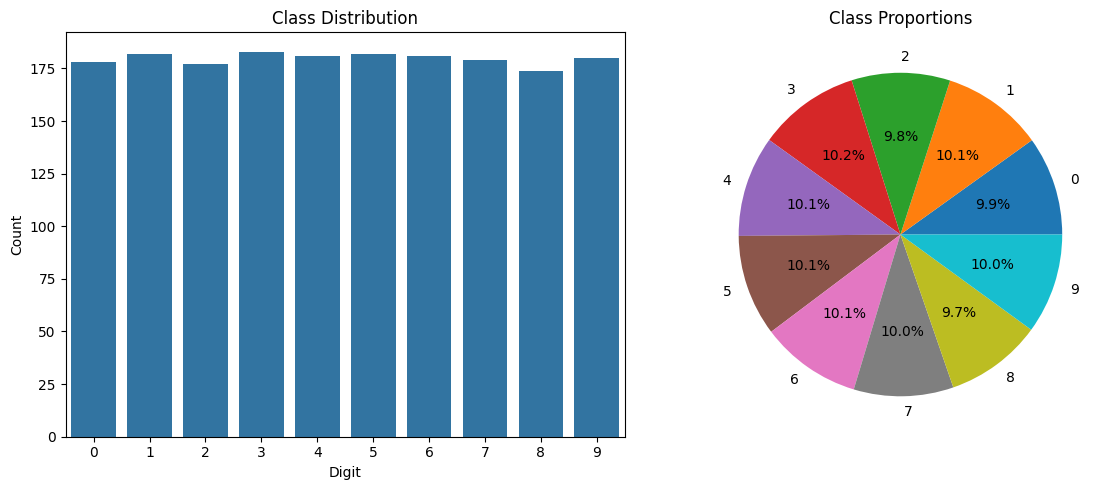

In [12]:
# Target distribution
print("\n=== TARGET DISTRIBUTION ===")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title('Class Distribution')
plt.xlabel('Digit')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
class_counts = pd.Series(y).value_counts().sort_index()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Proportions')

plt.tight_layout()
plt.show()

## 4. Feature Distributions and Correlation


=== FEATURE DISTRIBUTIONS ===


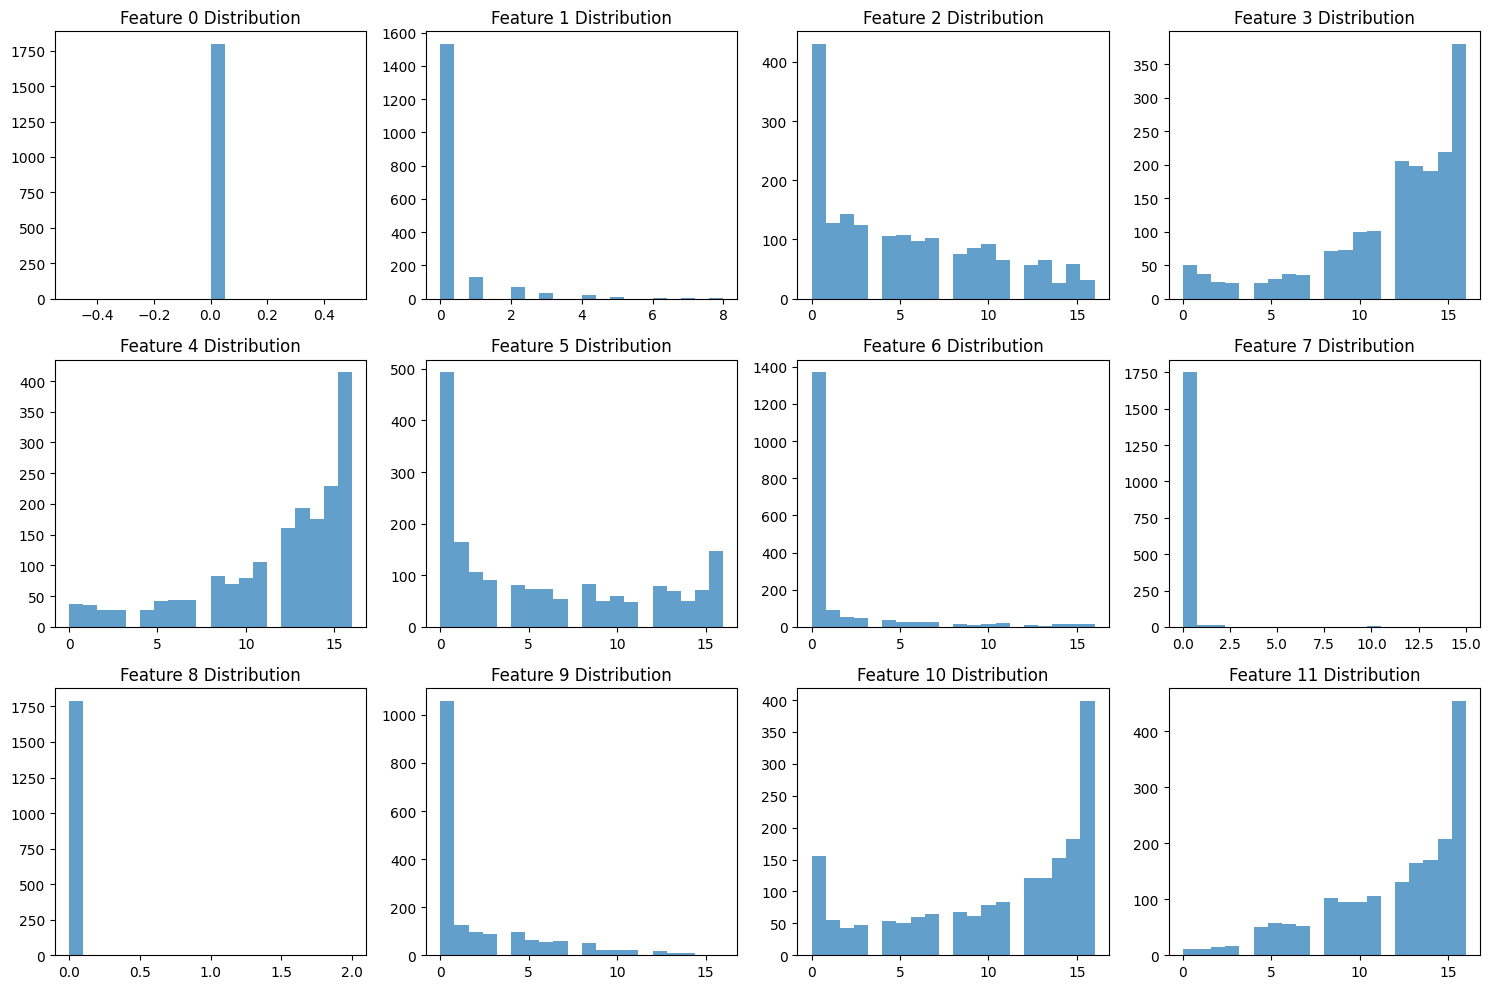


=== CORRELATION ANALYSIS ===


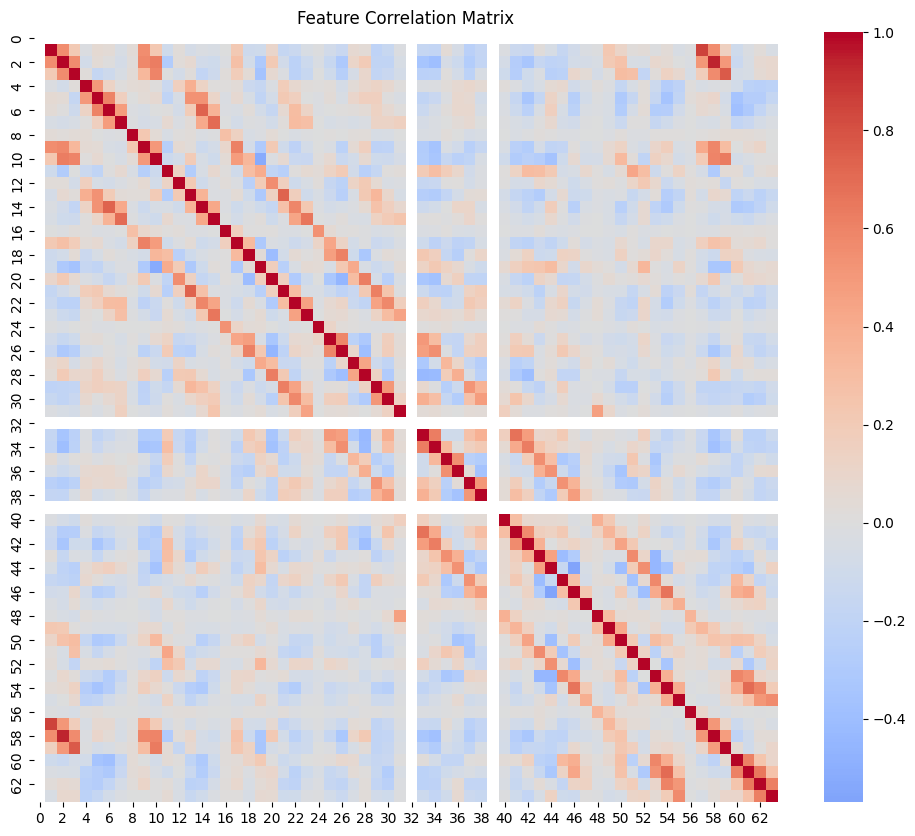

In [13]:
# Feature distributions
print("\n=== FEATURE DISTRIBUTIONS ===")
plt.figure(figsize=(15, 10))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.hist(X[:, i], bins=20, alpha=0.7)
    plt.title(f'Feature {i} Distribution')
plt.tight_layout()
plt.show()

# Correlation analysis
print("\n=== CORRELATION ANALYSIS ===")
plt.figure(figsize=(12, 10))
corr_matrix = pd.DataFrame(X).corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

## 5. Sample Image Visualization


=== SAMPLE IMAGES ===


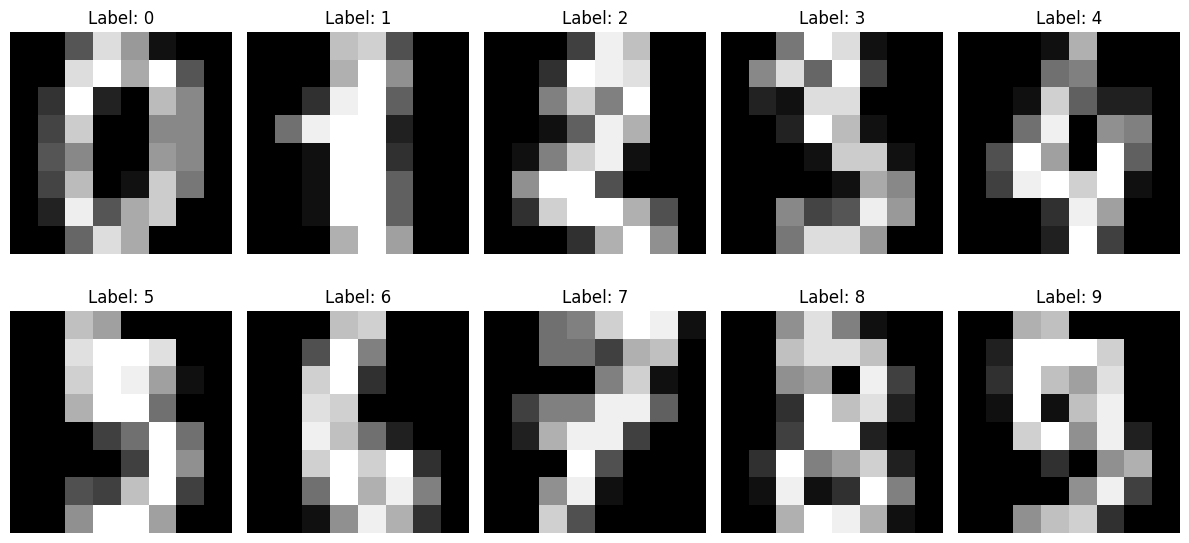

In [14]:
# Sample images
print("\n=== SAMPLE IMAGES ===")
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    # Reshape the 64-feature vector back into an 8x8 image
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

## 6. Outlier Detection and Dimensionality Reduction (PCA)


=== OUTLIER DETECTION ===


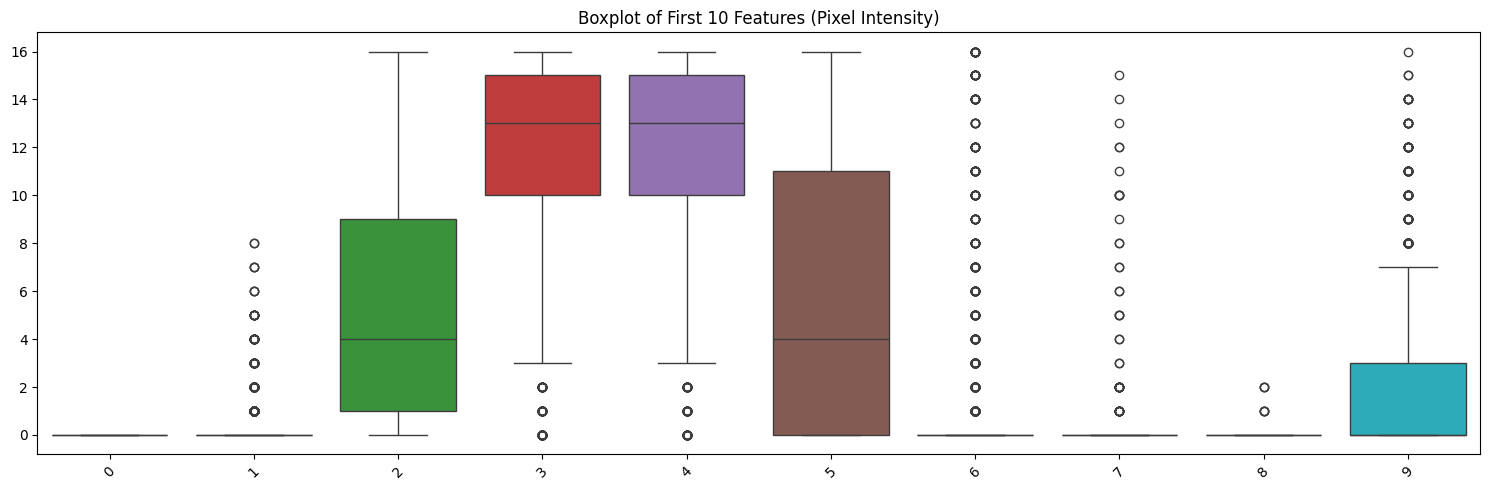

In [17]:
# Outlier detection
print("\n=== OUTLIER DETECTION ===")
plt.figure(figsize=(15, 5))

sns.boxplot(data=pd.DataFrame(X[:, :10])) # Boxplot of first 10 features
plt.title('Boxplot of First 10 Features (Pixel Intensity)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()